# 2. Clustering

__In this second section, I will proceed with some data exploration steps.__

__The Tableau visualization of the single features' variations through time is already a good indicator on how music preferences of Spotify users have changed in the course of this year. However, as each song is a combination of these preferences, I was also interested in understanding how these combinations have changed. Spotify suggests song moods already, but I was curious to look for feature groupings in this specific dataset and in giving my own interpretation to them.__

__In order to do this, I divided this section into the following steps:__

2.1. : Preparation of the datasets, data wrangling & analysis.

2.2. : Implementation of the K-means clustering machine learning model.

# 2.1. Preparing the data set

In [88]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [90]:
tracks = pd.read_csv("Desktop/Final Project/tracks_with_streams.csv")
tracks

#first of all, I will read the "tracks" dataset that I created in the previous section as it will be useful 
#at the last stage of this analysis to build the final dataset, 
#which will include song information, features and the respective clusters.

,Unnamed: 0,Title,Artist,Song ID,Chart Date,Streams
0,0,Happy Birthday,Sfera Ebbasta,7Cw97917dvg5xm6XMAA4Y2,2018-12-01,"775,056"
1,1,IL CIELO NELLA STANZA (feat. NSTASIA),Salmo,2fkVZYFv9hOejIsLzZy8ad,2018-12-01,"431,785"
2,2,Torna a casa,Måneskin,3590AAEoqH50z4UmhMIY85,2018-12-01,"349,868"
3,3,La fine del mondo,"Anastasio, Don Joe",3FhWEh7VTAOYK4edZqNWNB,2018-12-01,"324,392"
4,4,CABRIOLET (feat. Sfera Ebbasta),Salmo,7wC76LWyNxaP3hjGzbWOcN,2018-12-01,"293,803"
...,...,...,...,...,...,...
170795,170795,m12ano - feat. Mara Sattei,tha Supreme,0LfMuWu6FKNSDHEoxHu9iK,2020-12-01,"30,677"
170796,170796,Sweater Weather,The Neighbourhood,2QjOHCTQ1Jl3zawyYOpxh6,2020-12-01,"30,526"
170797,170797,BLOODY BARS - DRILLUMINAZIONE (feat. Charlie K...,"BLOODY VINYL, Slait, Young Miles, tha Supreme,...",2RBBYwsf1SKX64nwfbfDlk,2020-12-01,"30,422"
170798,170798,È sempre bello,Coez,6IdiuMw1FSAvU3e6bgWQVX,2020-12-01,"30,132"


In [3]:
features = pd.read_csv("Desktop/Final Project/features.csv")
#I finally read the most important dataset of this section, the csv displaying the features also obtained in the stage 1, and I proceed with cleaning it.

In [4]:
features = features.rename(columns = {'id':'Song ID'})

In [5]:
features

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,Song ID,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.792,0.777,8,-4.402,0,0.0454,0.0455,0.000053,0.2930,0.696,137.050,audio_features,7Cw97917dvg5xm6XMAA4Y2,spotify:track:7Cw97917dvg5xm6XMAA4Y2,https://api.spotify.com/v1/tracks/7Cw97917dvg5...,https://api.spotify.com/v1/audio-analysis/7Cw9...,170707,4
1,1,0.755,0.501,1,-9.551,1,0.1890,0.0867,0.000001,0.1460,0.267,134.998,audio_features,2fkVZYFv9hOejIsLzZy8ad,spotify:track:2fkVZYFv9hOejIsLzZy8ad,https://api.spotify.com/v1/tracks/2fkVZYFv9hOe...,https://api.spotify.com/v1/audio-analysis/2fkV...,186213,4
2,2,0.425,0.638,1,-3.184,0,0.0759,0.4260,0.000000,0.1770,0.450,81.396,audio_features,3590AAEoqH50z4UmhMIY85,spotify:track:3590AAEoqH50z4UmhMIY85,https://api.spotify.com/v1/tracks/3590AAEoqH50...,https://api.spotify.com/v1/audio-analysis/3590...,230667,4
3,3,0.683,0.622,1,-5.895,0,0.1750,0.0165,0.000000,0.1200,0.328,159.946,audio_features,3FhWEh7VTAOYK4edZqNWNB,spotify:track:3FhWEh7VTAOYK4edZqNWNB,https://api.spotify.com/v1/tracks/3FhWEh7VTAOY...,https://api.spotify.com/v1/audio-analysis/3FhW...,183000,4
4,4,0.548,0.531,0,-7.436,1,0.2640,0.1500,0.000010,0.0919,0.309,150.058,audio_features,7wC76LWyNxaP3hjGzbWOcN,spotify:track:7wC76LWyNxaP3hjGzbWOcN,https://api.spotify.com/v1/tracks/7wC76LWyNxaP...,https://api.spotify.com/v1/audio-analysis/7wC7...,185573,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,66,0.321,0.640,2,-10.023,1,0.0324,0.2800,0.000000,0.7180,0.414,146.172,audio_features,27RYrbL6S02LNVhDWVl38b,spotify:track:27RYrbL6S02LNVhDWVl38b,https://api.spotify.com/v1/tracks/27RYrbL6S02L...,https://api.spotify.com/v1/audio-analysis/27RY...,214333,3
2967,67,0.347,0.600,3,-5.254,1,0.0303,0.4510,0.000000,0.2790,0.158,172.062,audio_features,2ohR9Qj4TgZafZCptO9cly,spotify:track:2ohR9Qj4TgZafZCptO9cly,https://api.spotify.com/v1/tracks/2ohR9Qj4TgZa...,https://api.spotify.com/v1/audio-analysis/2ohR...,254707,4
2968,68,0.529,0.772,2,-7.013,1,0.0287,0.4030,0.000002,0.3160,0.853,91.751,audio_features,46UMwpkxyIwzqhsaONm4wf,spotify:track:46UMwpkxyIwzqhsaONm4wf,https://api.spotify.com/v1/tracks/46UMwpkxyIwz...,https://api.spotify.com/v1/audio-analysis/46UM...,181267,4
2969,69,0.810,0.511,5,-6.924,0,0.1640,0.1200,0.000000,0.0832,0.837,151.947,audio_features,6zFMeegAMYQo0mt8rXtrli,spotify:track:6zFMeegAMYQo0mt8rXtrli,https://api.spotify.com/v1/tracks/6zFMeegAMYQo...,https://api.spotify.com/v1/audio-analysis/6zFM...,154998,4


In [6]:
features.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [7]:
# drop every row that contains any nan's
features = features.dropna(how='any',axis=0)
features.shape #no nas.

(2971, 18)

In [8]:
features_numeric = features.select_dtypes(['number'])
#I select only the numeric datatypes of the features database

In [9]:
features_nonnumeric = features.drop(columns=features_numeric.columns)
#and I also distinguish them from a nonnumeric dataset

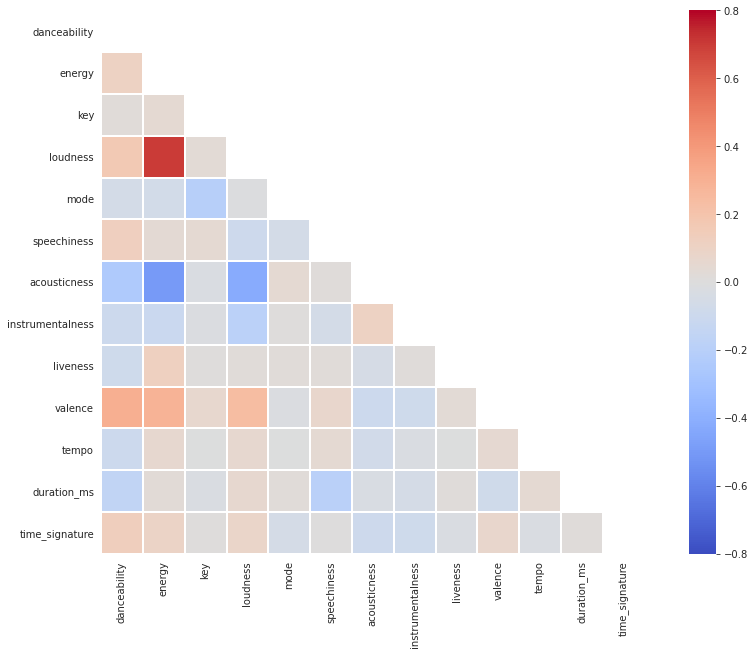

In [10]:
#now I am ready to check for correlations between the numeric variables, 
#and I notice that loudness and energy are highly correlated with a risk of multicollinearity.

mask = np.zeros_like(features_numeric.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(features_numeric.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [11]:
#I decide to delete loudness as energy is more in line with the purpose of this research, together with duration, time signature, key instrumentalness, speechiness and mode. After reading some articles, 
#I indeed realized that these features are not perfectly representative of the mood, but more of the style of the song.
features_numeric.drop(['loudness'], axis=1, inplace=True) 

/Users/valeriaminervini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
features_numeric.drop(['duration_ms'], axis=1, inplace=True) 

In [13]:
features_numeric.drop(['time_signature'], axis=1, inplace=True) 

In [14]:
features_numeric.drop(['key'], axis=1, inplace=True) 

In [15]:
features_numeric.drop(['instrumentalness'], axis=1, inplace=True) 

In [16]:
features_numeric.drop(['speechiness'], axis=1, inplace=True) 

In [17]:
features_numeric.drop(['mode'], axis=1, inplace=True) 

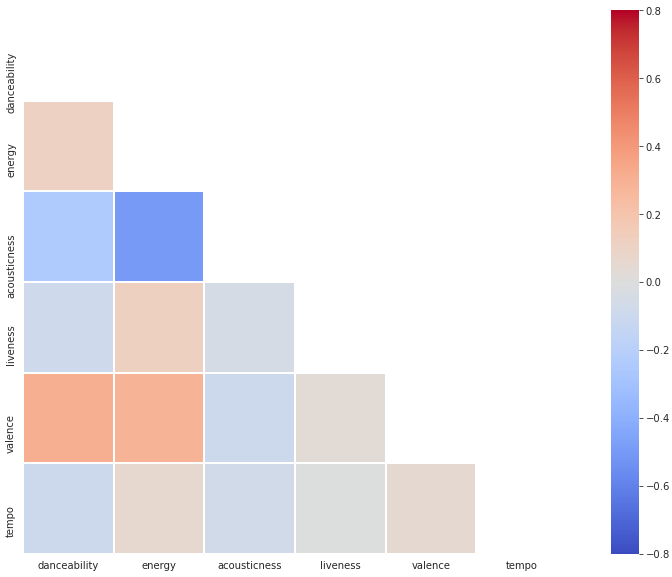

In [18]:
#when running the correlation map again, I can see that none of the variables present high correlation.
#Moreover, I have now only the variables that I need to run the clustering.

mask = np.zeros_like(features_numeric.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(features_numeric.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

Finally, my dataset is ready to be used for the machine learning model. For this research, I will use the following variables: 

- __danceability__:

__Spotify definition__: Danceability describes how suitable a track is for dancing based on a combination of musical      elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least             danceable and 1.0 is most danceable. 
__I chose it because__ it hints at a cheerful mood/ party time.  

- __energy__: 

__Spotify definition__: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a    Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic               range, perceived loudness, timbre, onset rate, and general entropy.
__I chose it because__ it hints at active/lively/strong feelings.

- __acousticness__: 

__Spotify definition__: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
__I chose it because__ it hints at the presence or not of electronic sound components. 

- __liveness__: 

__Spotify definition__: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
__I chose it because__ it hints at the choice to have a live experience (possible in lockdown times).

- __valence__: 

__Spotify definition__: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
__I chose it because__, despite it regards subjective feelings, it can be a good indicator of the nature of a song.

# 2.2. K-means clustering - the model

In this section, I will finally run the model and check the optimal number of clusters. This decision will be based on the elbow model at first, and then by the significance of the clusters at a later stage.

In [19]:

import spotipy as sp
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

In [20]:
X = features_numeric #all the features are between 0 and 1 except tempo. rescaling is needed.
X

,danceability,energy,acousticness,liveness,valence,tempo
0,0.792,0.777,0.0455,0.2930,0.696,137.050
1,0.755,0.501,0.0867,0.1460,0.267,134.998
2,0.425,0.638,0.4260,0.1770,0.450,81.396
3,0.683,0.622,0.0165,0.1200,0.328,159.946
4,0.548,0.531,0.1500,0.0919,0.309,150.058
...,...,...,...,...,...,...
2966,0.321,0.640,0.2800,0.7180,0.414,146.172
2967,0.347,0.600,0.4510,0.2790,0.158,172.062
2968,0.529,0.772,0.4030,0.3160,0.853,91.751
2969,0.810,0.511,0.1200,0.0832,0.837,151.947


In [21]:
X_prep = StandardScaler().fit_transform(X) 

In [22]:
df_cluster = pd.DataFrame(X_prep)

In [23]:
df_cluster

,0,1,2,3,4,5
0,0.863003,0.769569,-0.812546,0.914472,1.016558,0.576052
1,0.592473,-1.106132,-0.627942,-0.224140,-1.036062,0.503612
2,-1.820364,-0.175078,0.892360,0.015976,-0.160469,-1.388655
3,0.066036,-0.283814,-0.942487,-0.425527,-0.744197,1.384331
4,-0.921034,-0.902252,-0.344313,-0.643180,-0.835106,1.035263
...,...,...,...,...,...,...
2966,-2.580773,-0.161486,0.238178,4.206378,-0.332717,0.898079
2967,-2.390670,-0.433326,1.004377,0.806033,-1.557590,1.812052
2968,-1.059954,0.735589,0.789303,1.092622,1.767749,-1.023101
2969,0.994612,-1.038172,-0.478734,-0.710567,1.691195,1.101949


In [24]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10)

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [25]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 23.051929395087694
2 : 13.393569495397179
3 : 9.174455816915017
4 : 7.112377550300292
5 : 5.641663702727693
6 : 4.900547446146626
7 : 4.31969958425979
8 : 3.704779223482846
9 : 3.3209118351940363


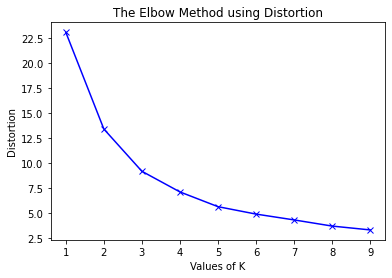

In [26]:
#the distortion drops until k=3 and sharply flattens after k=5. 
#Complexity/accuracy trade off: more than K=2 did not add value.
#I will choose only two


plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [97]:
kmeans = KMeans(n_clusters=2, random_state=17)
kmeans.fit(X_prep)

KMeans(n_clusters=2, random_state=17)

In [98]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(df_cluster)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_cluster)

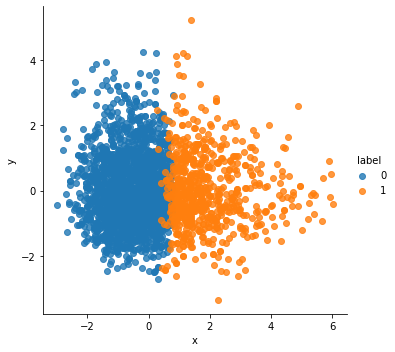

In [99]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [100]:
kmeans.inertia_

14454.524957427899

In [103]:
# Predicting / assigning the clusters
clusters = kmeans.predict(X_prep)

In [104]:
# show the count of clusters 1, 2, 3 ... 8
pd.DataFrame(pd.Series(clusters).value_counts().sort_index(),
            columns=['count'],
            )

,count
0,2257
1,714


In [105]:
X_df = pd.DataFrame(X)
X_df['cluster']=clusters

In [106]:
X_df

,danceability,energy,acousticness,liveness,valence,tempo,cluster
0,0.792,0.777,0.0455,0.2930,0.696,137.050,0
1,0.755,0.501,0.0867,0.1460,0.267,134.998,0
2,0.425,0.638,0.4260,0.1770,0.450,81.396,1
3,0.683,0.622,0.0165,0.1200,0.328,159.946,0
4,0.548,0.531,0.1500,0.0919,0.309,150.058,1
...,...,...,...,...,...,...,...
2966,0.321,0.640,0.2800,0.7180,0.414,146.172,1
2967,0.347,0.600,0.4510,0.2790,0.158,172.062,1
2968,0.529,0.772,0.4030,0.3160,0.853,91.751,0
2969,0.810,0.511,0.1200,0.0832,0.837,151.947,0


In [107]:
df_songs_clustered = pd.concat([features_nonnumeric, X_df], 
                              axis=1)

In [108]:
final_df = df_songs_clustered

In [109]:
final_df

,type,Song ID,uri,track_href,analysis_url,danceability,energy,acousticness,liveness,valence,tempo,cluster
0,audio_features,7Cw97917dvg5xm6XMAA4Y2,spotify:track:7Cw97917dvg5xm6XMAA4Y2,https://api.spotify.com/v1/tracks/7Cw97917dvg5...,https://api.spotify.com/v1/audio-analysis/7Cw9...,0.792,0.777,0.0455,0.2930,0.696,137.050,0
1,audio_features,2fkVZYFv9hOejIsLzZy8ad,spotify:track:2fkVZYFv9hOejIsLzZy8ad,https://api.spotify.com/v1/tracks/2fkVZYFv9hOe...,https://api.spotify.com/v1/audio-analysis/2fkV...,0.755,0.501,0.0867,0.1460,0.267,134.998,0
2,audio_features,3590AAEoqH50z4UmhMIY85,spotify:track:3590AAEoqH50z4UmhMIY85,https://api.spotify.com/v1/tracks/3590AAEoqH50...,https://api.spotify.com/v1/audio-analysis/3590...,0.425,0.638,0.4260,0.1770,0.450,81.396,1
3,audio_features,3FhWEh7VTAOYK4edZqNWNB,spotify:track:3FhWEh7VTAOYK4edZqNWNB,https://api.spotify.com/v1/tracks/3FhWEh7VTAOY...,https://api.spotify.com/v1/audio-analysis/3FhW...,0.683,0.622,0.0165,0.1200,0.328,159.946,0
4,audio_features,7wC76LWyNxaP3hjGzbWOcN,spotify:track:7wC76LWyNxaP3hjGzbWOcN,https://api.spotify.com/v1/tracks/7wC76LWyNxaP...,https://api.spotify.com/v1/audio-analysis/7wC7...,0.548,0.531,0.1500,0.0919,0.309,150.058,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2966,audio_features,27RYrbL6S02LNVhDWVl38b,spotify:track:27RYrbL6S02LNVhDWVl38b,https://api.spotify.com/v1/tracks/27RYrbL6S02L...,https://api.spotify.com/v1/audio-analysis/27RY...,0.321,0.640,0.2800,0.7180,0.414,146.172,1
2967,audio_features,2ohR9Qj4TgZafZCptO9cly,spotify:track:2ohR9Qj4TgZafZCptO9cly,https://api.spotify.com/v1/tracks/2ohR9Qj4TgZa...,https://api.spotify.com/v1/audio-analysis/2ohR...,0.347,0.600,0.4510,0.2790,0.158,172.062,1
2968,audio_features,46UMwpkxyIwzqhsaONm4wf,spotify:track:46UMwpkxyIwzqhsaONm4wf,https://api.spotify.com/v1/tracks/46UMwpkxyIwz...,https://api.spotify.com/v1/audio-analysis/46UM...,0.529,0.772,0.4030,0.3160,0.853,91.751,0
2969,audio_features,6zFMeegAMYQo0mt8rXtrli,spotify:track:6zFMeegAMYQo0mt8rXtrli,https://api.spotify.com/v1/tracks/6zFMeegAMYQo...,https://api.spotify.com/v1/audio-analysis/6zFM...,0.810,0.511,0.1200,0.0832,0.837,151.947,0


In [79]:
final_df.drop(['type'], axis=1, inplace=True) 

In [80]:
final_df.to_csv('2clusters_no_duplicates_final', index = True) 

In [81]:
df_complete= pd.merge(tracks, final_df, on='Song ID', how='left')

In [82]:
df_complete

,Unnamed: 0,Title,Artist,Song ID,Chart Date,Streams,uri,track_href,analysis_url,danceability,energy,acousticness,liveness,valence,tempo,cluster
0,0,Happy Birthday,Sfera Ebbasta,7Cw97917dvg5xm6XMAA4Y2,2018-12-01,"775,056",spotify:track:7Cw97917dvg5xm6XMAA4Y2,https://api.spotify.com/v1/tracks/7Cw97917dvg5...,https://api.spotify.com/v1/audio-analysis/7Cw9...,0.792,0.777,0.0455,0.2930,0.696,137.050,0
1,1,IL CIELO NELLA STANZA (feat. NSTASIA),Salmo,2fkVZYFv9hOejIsLzZy8ad,2018-12-01,"431,785",spotify:track:2fkVZYFv9hOejIsLzZy8ad,https://api.spotify.com/v1/tracks/2fkVZYFv9hOe...,https://api.spotify.com/v1/audio-analysis/2fkV...,0.755,0.501,0.0867,0.1460,0.267,134.998,0
2,2,Torna a casa,Måneskin,3590AAEoqH50z4UmhMIY85,2018-12-01,"349,868",spotify:track:3590AAEoqH50z4UmhMIY85,https://api.spotify.com/v1/tracks/3590AAEoqH50...,https://api.spotify.com/v1/audio-analysis/3590...,0.425,0.638,0.4260,0.1770,0.450,81.396,1
3,3,La fine del mondo,"Anastasio, Don Joe",3FhWEh7VTAOYK4edZqNWNB,2018-12-01,"324,392",spotify:track:3FhWEh7VTAOYK4edZqNWNB,https://api.spotify.com/v1/tracks/3FhWEh7VTAOY...,https://api.spotify.com/v1/audio-analysis/3FhW...,0.683,0.622,0.0165,0.1200,0.328,159.946,0
4,4,CABRIOLET (feat. Sfera Ebbasta),Salmo,7wC76LWyNxaP3hjGzbWOcN,2018-12-01,"293,803",spotify:track:7wC76LWyNxaP3hjGzbWOcN,https://api.spotify.com/v1/tracks/7wC76LWyNxaP...,https://api.spotify.com/v1/audio-analysis/7wC7...,0.548,0.531,0.1500,0.0919,0.309,150.058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170795,170795,m12ano - feat. Mara Sattei,tha Supreme,0LfMuWu6FKNSDHEoxHu9iK,2020-12-01,"30,677",spotify:track:0LfMuWu6FKNSDHEoxHu9iK,https://api.spotify.com/v1/tracks/0LfMuWu6FKNS...,https://api.spotify.com/v1/audio-analysis/0LfM...,0.577,0.514,0.0431,0.0843,0.479,64.822,0
170796,170796,Sweater Weather,The Neighbourhood,2QjOHCTQ1Jl3zawyYOpxh6,2020-12-01,"30,526",spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,https://api.spotify.com/v1/tracks/2QjOHCTQ1Jl3...,https://api.spotify.com/v1/audio-analysis/2QjO...,0.612,0.807,0.0495,0.1010,0.398,124.053,0
170797,170797,BLOODY BARS - DRILLUMINAZIONE (feat. Charlie K...,"BLOODY VINYL, Slait, Young Miles, tha Supreme,...",2RBBYwsf1SKX64nwfbfDlk,2020-12-01,"30,422",spotify:track:2RBBYwsf1SKX64nwfbfDlk,https://api.spotify.com/v1/tracks/2RBBYwsf1SKX...,https://api.spotify.com/v1/audio-analysis/2RBB...,0.675,0.945,0.0502,0.7200,0.556,140.039,0
170798,170798,È sempre bello,Coez,6IdiuMw1FSAvU3e6bgWQVX,2020-12-01,"30,132",spotify:track:6IdiuMw1FSAvU3e6bgWQVX,https://api.spotify.com/v1/tracks/6IdiuMw1FSAv...,https://api.spotify.com/v1/audio-analysis/6Idi...,0.692,0.630,0.0732,0.0865,0.499,110.919,0


In [83]:
df_complete.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [84]:
df_complete

,Title,Artist,Song ID,Chart Date,Streams,uri,track_href,analysis_url,danceability,energy,acousticness,liveness,valence,tempo,cluster
0,Happy Birthday,Sfera Ebbasta,7Cw97917dvg5xm6XMAA4Y2,2018-12-01,"775,056",spotify:track:7Cw97917dvg5xm6XMAA4Y2,https://api.spotify.com/v1/tracks/7Cw97917dvg5...,https://api.spotify.com/v1/audio-analysis/7Cw9...,0.792,0.777,0.0455,0.2930,0.696,137.050,0
1,IL CIELO NELLA STANZA (feat. NSTASIA),Salmo,2fkVZYFv9hOejIsLzZy8ad,2018-12-01,"431,785",spotify:track:2fkVZYFv9hOejIsLzZy8ad,https://api.spotify.com/v1/tracks/2fkVZYFv9hOe...,https://api.spotify.com/v1/audio-analysis/2fkV...,0.755,0.501,0.0867,0.1460,0.267,134.998,0
2,Torna a casa,Måneskin,3590AAEoqH50z4UmhMIY85,2018-12-01,"349,868",spotify:track:3590AAEoqH50z4UmhMIY85,https://api.spotify.com/v1/tracks/3590AAEoqH50...,https://api.spotify.com/v1/audio-analysis/3590...,0.425,0.638,0.4260,0.1770,0.450,81.396,1
3,La fine del mondo,"Anastasio, Don Joe",3FhWEh7VTAOYK4edZqNWNB,2018-12-01,"324,392",spotify:track:3FhWEh7VTAOYK4edZqNWNB,https://api.spotify.com/v1/tracks/3FhWEh7VTAOY...,https://api.spotify.com/v1/audio-analysis/3FhW...,0.683,0.622,0.0165,0.1200,0.328,159.946,0
4,CABRIOLET (feat. Sfera Ebbasta),Salmo,7wC76LWyNxaP3hjGzbWOcN,2018-12-01,"293,803",spotify:track:7wC76LWyNxaP3hjGzbWOcN,https://api.spotify.com/v1/tracks/7wC76LWyNxaP...,https://api.spotify.com/v1/audio-analysis/7wC7...,0.548,0.531,0.1500,0.0919,0.309,150.058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170795,m12ano - feat. Mara Sattei,tha Supreme,0LfMuWu6FKNSDHEoxHu9iK,2020-12-01,"30,677",spotify:track:0LfMuWu6FKNSDHEoxHu9iK,https://api.spotify.com/v1/tracks/0LfMuWu6FKNS...,https://api.spotify.com/v1/audio-analysis/0LfM...,0.577,0.514,0.0431,0.0843,0.479,64.822,0
170796,Sweater Weather,The Neighbourhood,2QjOHCTQ1Jl3zawyYOpxh6,2020-12-01,"30,526",spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,https://api.spotify.com/v1/tracks/2QjOHCTQ1Jl3...,https://api.spotify.com/v1/audio-analysis/2QjO...,0.612,0.807,0.0495,0.1010,0.398,124.053,0
170797,BLOODY BARS - DRILLUMINAZIONE (feat. Charlie K...,"BLOODY VINYL, Slait, Young Miles, tha Supreme,...",2RBBYwsf1SKX64nwfbfDlk,2020-12-01,"30,422",spotify:track:2RBBYwsf1SKX64nwfbfDlk,https://api.spotify.com/v1/tracks/2RBBYwsf1SKX...,https://api.spotify.com/v1/audio-analysis/2RBB...,0.675,0.945,0.0502,0.7200,0.556,140.039,0
170798,È sempre bello,Coez,6IdiuMw1FSAvU3e6bgWQVX,2020-12-01,"30,132",spotify:track:6IdiuMw1FSAvU3e6bgWQVX,https://api.spotify.com/v1/tracks/6IdiuMw1FSAv...,https://api.spotify.com/v1/audio-analysis/6Idi...,0.692,0.630,0.0732,0.0865,0.499,110.919,0


In [85]:
df_complete.to_csv('df_complete_with 2 clusters_final', index = True) 